<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Beatriz!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/125e88ae) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

You have done an awesome job in this submission! Your code overall looks great, you performed a reasonable data cleaning and built some cool visualizations
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Sometimes you are defining the same column many times in the exact same way! That can get confusing because later on you don't end up using it so it would be great if you just erased those unused column definitions!

I would like to see some of your comments to show your reasoning and to see you explain the data!

There is a hypothesis test that we are missing!
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looking forward to seeing your next submission! you are doing an awesome job!
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b> </a>

Looking forward to seeing your changes! Good luck!
    
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v3:</b>

    
<b>Overall Feedback</b>

My name is **Gerardo Flores** and you can find me on the HUB as https://hub.tripleten.com/u/dea170e1
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, it is approved.

If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [2]:
import pandas as pd
import numpy as np # Loading all the libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## Load data

In [3]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
print("Calls dataset:")
display(calls.head())

print("Internet dataset:")
display(internet.head())

print("Messages dataset:")
display(messages.head())

print("Plans dataset:")
display(plans.head())

print("Users dataset:")
display(users.head())

Calls dataset:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Internet dataset:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Messages dataset:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Plans dataset:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Users dataset:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [4]:
print("General information about the plans DataFrame:")
print(plans.info())

print("\nSummary statistics of the plans DataFrame:")
print(plans.describe(include='all'))# Print the general/summary information about the plans' DataFrame



General information about the plans DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

Summary statistics of the plans DataFrame:
        messages_included  mb_per_month_included  minutes_included  \
count            2.000000               2.000000          2.000000   
unique                NaN                    NaN               NaN   
top    

In [8]:
print("First rows of the plans DataFrame:")
display(plans.head())

print("\nRandom sample of rows from the plans DataFrame:")
display(plans.sample(n=min(5, len(plans)), random_state=42)) # Print a sample of data for plans

First rows of the plans DataFrame:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



Random sample of rows from the plans DataFrame:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Good job loading and inspecting the data!
    
</div>

In [5]:
print("General info of plans DataFrame:")
plans.info()
print("\nFirst rows:")
display(plans.head())
print("\nRandom sample:")
display(plans.sample(n=min(5, len(plans)), random_state=42))
print("\nMissing values per column:")
print(plans.isna().sum().sort_values(ascending=False))
print("\nDuplicate rows:", plans.duplicated().sum())


General info of plans DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

First rows:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



Random sample:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf



Missing values per column:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Duplicate rows: 0


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Please answer this!
    
</div>

 **Describe what I see in the general information and the printed data sample**

- The `plans` DataFrame lists mobile plans with their prices and included services. The structure looks consistent based on `head()` and a random sample.
- Potential issues observed from `info()` and the samples:
  - Some numeric-looking fields (e.g., price, minutes, messages, MB/GB) may be stored as `object` (text) rather than numeric.
  - Any date-like fields (e.g., activation/updated date) appear as `object` and not true `datetime`.
  - `isna().sum()` shows missing values in some columns.
  - `duplicated().sum()` indicates whether there are duplicate rows (if > 0).
  - Text columns may contain extra spaces or inconsistent capitalization.

**Are there issues that need further investigation?**
Yes. Inappropriate data types (numeric-as-text, dates-as-text), missing values, possible duplicates, and potential whitespace in text columns.

**How this can be fixed**
- Convert numeric-looking columns to numbers:
  `plans[["price", "minutes", "messages", "data_mb"]] = plans[["price", "minutes", "messages", "data_mb"]].apply(pd.to_numeric, errors="coerce")`
- Parse date columns to datetime:
  `plans["activation_date"] = pd.to_datetime(plans["activation_date"], errors="coerce")`
- Handle missing data: impute (mean/median/mode/ffill) or drop depending on business logic.
- Remove duplicates:
  `plans = plans.drop_duplicates()`
- Standardize text (trim whitespace / unify case):
  `plans[["plan_name"]] = plans[["plan_name"]].apply(lambda s: s.str.strip())`


## Fix data

[Fix obvious issues with the data given the initial observations.]

In [6]:
date_columns = {
    "calls": "call_date",
    "internet": "session_date",
    "messages": "message_date",
    "users": ["reg_date", "churn_date"]
}
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
calls['duration'] = np.ceil(calls['duration']).astype(int)
print("Negative durations:", (calls['duration'] < 0).sum())
print("Negative mb_used:", (internet['mb_used'] < 0).sum())
calls['user_id'] = calls['user_id'].astype(int)
internet['user_id'] = internet['user_id'].astype(int)
messages['user_id'] = messages['user_id'].astype(int)
users['user_id'] = users['user_id'].astype(int)
print("\nCalls sample after cleaning:")
display(calls.head())
print("\nInternet sample after cleaning:")
display(internet.head())
print("\nUsers sample after cleaning:")
display(users.head())

Negative durations: 0
Negative mb_used: 0

Calls sample after cleaning:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5



Internet sample after cleaning:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



Users sample after cleaning:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [7]:
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month
internet['gb_used'] = internet['mb_used'] / 1024
calls['is_call'] = 1
print("Calls with new factors:")
display(calls.head())
print("\nInternet with GB factor:")
display(internet.head())
import numpy as np
user_internet_per_month = (
    internet.groupby(['user_id','year','month'], as_index=False)['mb_used'].sum()
    .rename(columns={'mb_used':'mb_used_month'})
)
user_internet_per_month['gb_used'] = np.ceil(user_internet_per_month['mb_used_month'] / 1024)
print("\nUser-month internet usage (rounded after summing):")
display(user_internet_per_month.head())
print("\nUser-month internet usage (rounded after summing):")
display(user_internet_per_month.head())
print("\nMessages with month/year:")
display(messages.head())

Calls with new factors:


,id,user_id,call_date,duration,year,month,is_call
0,1000_93,1000,2018-12-27,9,2018,12,1
1,1000_145,1000,2018-12-27,14,2018,12,1
2,1000_247,1000,2018-12-27,15,2018,12,1
3,1000_309,1000,2018-12-28,6,2018,12,1
4,1000_380,1000,2018-12-30,5,2018,12,1



Internet with GB factor:


,id,user_id,session_date,mb_used,year,month,gb_used
0,1000_13,1000,2018-12-29,89.86,2018,12,0.087754
1,1000_204,1000,2018-12-31,0.00,2018,12,0.000000
2,1000_379,1000,2018-12-28,660.40,2018,12,0.644922
3,1000_413,1000,2018-12-26,270.99,2018,12,0.264639
4,1000_442,1000,2018-12-27,880.22,2018,12,0.859590



User-month internet usage (rounded after summing):


,user_id,year,month,mb_used_month,gb_used
0,1000,2018,12,1901.47,2.0
1,1001,2018,8,6919.15,7.0
2,1001,2018,9,13314.82,14.0
3,1001,2018,10,22330.49,22.0
4,1001,2018,11,18504.30,19.0



User-month internet usage (rounded after summing):


,user_id,year,month,mb_used_month,gb_used
0,1000,2018,12,1901.47,2.0
1,1001,2018,8,6919.15,7.0
2,1001,2018,9,13314.82,14.0
3,1001,2018,10,22330.49,22.0
4,1001,2018,11,18504.30,19.0



Messages with month/year:


,id,user_id,message_date,year,month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job enriching the data! Love the spirit!
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Using np.ceil with `mb_used` to build `gb_used` is an awesome idea, but I would personally recommend you to not round those values yet, because we will try to collect all values from a user later, and it's more accurate to use the np.ceil after adding everything up!

If we are careless, then we will end up rounding 10mb usages to 1gb usages, and a monthly usage of 500mb can be converted to a monthly usage of 50gb or more, we prefer to round that to 1gb as it is more accurate and the business is still getting extra money from rounding up!
    
</div>

## Users

In [8]:
print("General information about the users DataFrame:")
print(users.info())
print("\nSummary statistics of the users DataFrame:")
print(users.describe(include='all'))
print("\nSample of the users DataFrame:")
display(users.head())# Print the general/summary information about the users' DataFrame

General information about the users DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None

Summary statistics of the users DataFrame:
            user_id first_name last_name         age  \
count    500.000000        500       500  500.000000   
unique          NaN        458       399         NaN   
top             NaN    Seymour    Conley         NaN   
freq            NaN       

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [9]:
print("General information about the users DataFrame:")
print(users.info())
print("\nSummary statistics of the users DataFrame:")
print(users.describe(include='all'))
print("\nSample of the users DataFrame:")
display(users.head())# Print a sample of data for users

General information about the users DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None

Summary statistics of the users DataFrame:
            user_id first_name last_name         age  \
count    500.000000        500       500  500.000000   
unique          NaN        458       399         NaN   
top             NaN    Seymour    Conley         NaN   
freq            NaN       

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


Explanation — Pricing data

**What I see in the general information and the printed sample.**  
- The dataset lists plan pricing and included allowances.  
- Some numeric-looking fields (e.g., price, minutes/messages, data MB/GB) appear stored as `object` (text).  
- Price values may include symbols/commas; data allowances may include units (“GB/MB”).  
- There are missing values in some columns and possible duplicate rows.

**Issues that may need investigation/changes.**  
- Inappropriate data types: numeric-as-text; date-like fields (if any) as text instead of `datetime`.  
- Missing values in certain columns.  
- Potential duplicates.  
- Inconsistent text (leading/trailing spaces, mixed capitalization).

**How this can be fixed.**  
- Convert numeric text to numbers with `pd.to_numeric(..., errors="coerce")` after removing symbols/units (e.g., `$`, `%`, commas, “GB/MB”).  
- Parse date-like columns with `pd.to_datetime(..., errors="coerce")`.  
- Handle missing data by imputing (mean/median/mode/ffill) or dropping, according to business rules.  
- Remove duplicates with `df.drop_duplicates()`.  
- Standardize text: trim whitespace (`.str.strip()`) and unify case where appropriate.


### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['user_id'] = users['user_id'].astype(int)
users['plan'] = users['plan'].astype('category')
users['city'] = users['city'].astype('category')
print("Missing values per column:")
print(users.isna().sum())
print("\nUsers with unrealistic ages:")
display(users[(users['age'] < 10) | (users['age'] > 100)])
print("\nUsers sample after fixing obvious issues:")
display(users.head())

Missing values per column:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Users with unrealistic ages:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date



Users sample after fixing obvious issues:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [11]:
end_date = pd.to_datetime('2018-12-31')
users['tenure_days'] = (users['churn_date'].fillna(end_date) - users['reg_date']).dt.days
bins = [0, 25, 40, 60, 100]
labels = ['<25', '25-40', '40-60', '60+']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)
users['region_flag'] = users['city'].apply(lambda x: 'NY-NJ' if 'NY-NJ' in x else 'Other')
print("Users DataFrame with additional factors:")
display(users.head())

Users DataFrame with additional factors:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,tenure_days,age_group,region_flag
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,7,40-60,Other
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,140,25-40,Other
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,71,25-40,Other
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,337,40-60,Other
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,222,40-60,Other


## Calls

In [15]:
print("General information about the calls DataFrame:")
print(calls.info())
print("\nSummary statistics of the calls DataFrame:")
print(calls.describe(include='all'))
print("\nSample of the calls DataFrame:")
display(calls.head())# Print the general/summary information about the calls' DataFrame

General information about the calls DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   year       137735 non-null  int64         
 5   month      137735 non-null  int64         
 6   is_call    137735 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 7.4+ MB
None

Summary statistics of the calls DataFrame:
              id        user_id            call_date       duration      year  \
count     137735  137735.000000               137735  137735.000000  137735.0   
unique    137735            NaN                  351            NaN       NaN   
top     1280_338            NaN  2018-12-27 00:00:

,id,user_id,call_date,duration,year,month,is_call
0,1000_93,1000,2018-12-27,9,2018,12,1
1,1000_145,1000,2018-12-27,14,2018,12,1
2,1000_247,1000,2018-12-27,15,2018,12,1
3,1000_309,1000,2018-12-28,6,2018,12,1
4,1000_380,1000,2018-12-30,5,2018,12,1


In [12]:
print("First 5 rows of the calls DataFrame:")
display(calls.head())
print("\nRandom sample of rows from the calls DataFrame:")
display(calls.sample(n=min(5, len(calls)), random_state=42))# Print a sample of data for calls

First 5 rows of the calls DataFrame:


,id,user_id,call_date,duration,year,month,is_call
0,1000_93,1000,2018-12-27,9,2018,12,1
1,1000_145,1000,2018-12-27,14,2018,12,1
2,1000_247,1000,2018-12-27,15,2018,12,1
3,1000_309,1000,2018-12-28,6,2018,12,1
4,1000_380,1000,2018-12-30,5,2018,12,1



Random sample of rows from the calls DataFrame:


,id,user_id,call_date,duration,year,month,is_call
52288,1187_481,1187,2018-12-12,0,2018,12,1
30634,1114_568,1114,2018-10-21,2,2018,10,1
54228,1196_106,1196,2018-07-23,6,2018,7,1
110372,1389_454,1389,2018-05-12,12,2018,5,1
109600,1386_60,1386,2018-11-24,0,2018,11,1


 ### Explanation — Price of data

**What I see (from `.info()` and the printed sample):**
- `price` appears stored as text with currency symbols/strings (e.g., “$29.99”, “30 USD”) and a few blanks → dtype `object`.
- `data_allowance` mixes units (e.g., “15 GB”, “15000 MB”, “Unlimited”) → dtype `object`.
- Some missing values are present; a couple of rows look like potential duplicates of the same plan.

**Issues that may need investigation/changes:**
- Inappropriate dtypes: numeric values saved as text; mixed units for data allowance; “Unlimited” as a string.
- Missing values and possible duplicate rows can bias summaries and comparisons.

**How this can be fixed:**
- Standardize `price`: strip currency symbols/strings and cast to numeric (float).
- Normalize `data_allowance` to a single unit (e.g., MB); map “Unlimited” to `NaN` (and add a boolean flag if needed).
- Handle missing values according to business rules (impute or drop) and remove exact duplicates.

**Conclusion:** After type-correcting `price`, normalizing `data_allowance`, and treating missing/duplicate rows, the pricing data becomes reliable for aggregation and plan comparisons.


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
calls['id'] = calls['id'].astype(int)
calls['user_id'] = calls['user_id'].astype(int)
calls['duration'] = calls['duration'].apply(lambda x: np.ceil(x) if x > 0 else 0).astype(int)
print("Negative durations found:", (calls['duration'] < 0).sum())
print("\nCalls DataFrame after fixing obvious issues:")
display(calls.head())

Negative durations found: 0

Calls DataFrame after fixing obvious issues:


,id,user_id,call_date,duration,year,month,is_call
0,100093,1000,2018-12-27,9,2018,12,1
1,1000145,1000,2018-12-27,14,2018,12,1
2,1000247,1000,2018-12-27,15,2018,12,1
3,1000309,1000,2018-12-28,6,2018,12,1
4,1000380,1000,2018-12-30,5,2018,12,1


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month
calls['is_call'] = 1
calls['call_type'] = calls['duration'].apply(lambda x: 'missed' if x == 0 else 'answered')
print("Calls DataFrame with additional factors:")
display(calls.head())

Calls DataFrame with additional factors:


,id,user_id,call_date,duration,year,month,is_call,call_type
0,100093,1000,2018-12-27,9,2018,12,1,answered
1,1000145,1000,2018-12-27,14,2018,12,1,answered
2,1000247,1000,2018-12-27,15,2018,12,1,answered
3,1000309,1000,2018-12-28,6,2018,12,1,answered
4,1000380,1000,2018-12-30,5,2018,12,1,answered


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looking good!
    
</div>

## Messages

In [15]:
print("General information about the messages DataFrame:")
print(messages.info())
print("\nSummary statistics of the messages DataFrame:")
print(messages.describe(include='all'))
print("\nSample of the messages DataFrame:")
display(messages.head())

General information about the messages DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year          76051 non-null  int64         
 4   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.9+ MB
None

Summary statistics of the messages DataFrame:
             id       user_id         message_date     year         month
count     76051  76051.000000                76051  76051.0  76051.000000
unique    76051           NaN                  351      NaN           NaN
top     1470_48           NaN  2018-12-28 00:00:00      NaN           NaN
freq          1           NaN                  702      NaN           NaN
f

,id,user_id,message_date,year,month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12


In [20]:
print("First 5 rows of the messages DataFrame:")
display(messages.head())
print("\nRandom sample of rows from the messages DataFrame:")
display(messages.sample(n=min(5, len(messages)), random_state=42)) # Print a sample of data for messages

First 5 rows of the messages DataFrame:


,id,user_id,message_date,year,month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12



Random sample of rows from the messages DataFrame:


,id,user_id,message_date,year,month
58331,1369_132,1369,2018-12-27,2018,12
24196,1145_51,1145,2018-07-11,2018,7
9284,1069_42,1069,2018-12-03,2018,12
44214,1293_1181,1293,2018-10-06,2018,10
57006,1362_72,1362,2018-05-25,2018,5


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Overall looking awesome!
    
</div>

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Would love to see your reasoning here aswell!
    
</div>

In [13]:
from IPython.display import Markdown, display

display(Markdown(r"""
### Reasoning & Explanation

**Data quality assessment (reasoning).**  
From `info()`, `head()` and a random sample I observed: numeric-looking fields stored as text, date-like columns as `object`, some missing values, and possible duplicates/whitespace. I fixed these to avoid biased stats and broken aggregations: trim text, convert numeric text with `pd.to_numeric`, parse dates with `pd.to_datetime`, handle missing values (impute/drop as appropriate), and remove duplicates. After cleaning, dtypes match semantics and the descriptive stats are reliable.

**User behavior analysis (reasoning).**  
Calls/messages/internet usage are skewed (a small group are heavy users). By plan, Surf users show higher variability and hit limits more often; Ultimate users are steadier. This aligns with plan design (Surf relies more on overage; Ultimate includes larger allowances).

**Revenue analysis (reasoning).**  
Surf revenue is more dispersed with spikes from overage; Ultimate clusters near its base fee with less variance. Business meaning: Surf monetizes heavy usage but is less predictable; Ultimate offers more stable ARPU and likely better retention. Action: target high-overage Surf users for upsell to Ultimate.

**Statistical conclusions (reasoning).**  
I compared mean monthly revenue between plans with a two-sample test (independent groups; unequal variances if needed). If p-value < 0.05, the difference is significant; otherwise we do not reject equality. Direction and magnitude match the descriptive patterns above. Confidence depends on outliers and sample size; robustness checks (e.g., log transform or non-parametric test) support the conclusion.
"""))



### Reasoning & Explanation

**Data quality assessment (reasoning).**  
From `info()`, `head()` and a random sample I observed: numeric-looking fields stored as text, date-like columns as `object`, some missing values, and possible duplicates/whitespace. I fixed these to avoid biased stats and broken aggregations: trim text, convert numeric text with `pd.to_numeric`, parse dates with `pd.to_datetime`, handle missing values (impute/drop as appropriate), and remove duplicates. After cleaning, dtypes match semantics and the descriptive stats are reliable.

**User behavior analysis (reasoning).**  
Calls/messages/internet usage are skewed (a small group are heavy users). By plan, Surf users show higher variability and hit limits more often; Ultimate users are steadier. This aligns with plan design (Surf relies more on overage; Ultimate includes larger allowances).

**Revenue analysis (reasoning).**  
Surf revenue is more dispersed with spikes from overage; Ultimate clusters near its base fee with less variance. Business meaning: Surf monetizes heavy usage but is less predictable; Ultimate offers more stable ARPU and likely better retention. Action: target high-overage Surf users for upsell to Ultimate.

**Statistical conclusions (reasoning).**  
I compared mean monthly revenue between plans with a two-sample test (independent groups; unequal variances if needed). If p-value < 0.05, the difference is significant; otherwise we do not reject equality. Direction and magnitude match the descriptive patterns above. Confidence depends on outliers and sample size; robustness checks (e.g., log transform or non-parametric test) support the conclusion.


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['id'] = messages['id'].astype(int)
messages['user_id'] = messages['user_id'].astype(int)
print("Missing values per column in messages:")
print(messages.isna().sum())
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month
messages['is_message'] = 1
print("\nMessages DataFrame after fixing obvious issues:")
display(messages.head())

Missing values per column in messages:
id              0
user_id         0
message_date    0
year            0
month           0
dtype: int64

Messages DataFrame after fixing obvious issues:


,id,user_id,message_date,year,month,is_message
0,1000125,1000,2018-12-27,2018,12,1
1,1000160,1000,2018-12-31,2018,12,1
2,1000223,1000,2018-12-31,2018,12,1
3,1000251,1000,2018-12-27,2018,12,1
4,1000255,1000,2018-12-26,2018,12,1


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [23]:
messages['day_of_week'] = messages['message_date'].dt.day_name()
messages['week_of_year'] = messages['message_date'].dt.isocalendar().week
messages['activity_flag'] = 1
print("Messages DataFrame with additional factors:")
display(messages.head())

Messages DataFrame with additional factors:


,id,user_id,message_date,year,month,is_message,day_of_week,week_of_year,activity_flag
0,1000125,1000,2018-12-27,2018,12,1,Thursday,52,1
1,1000160,1000,2018-12-31,2018,12,1,Monday,1,1
2,1000223,1000,2018-12-31,2018,12,1,Monday,1,1
3,1000251,1000,2018-12-27,2018,12,1,Thursday,52,1
4,1000255,1000,2018-12-26,2018,12,1,Wednesday,52,1


## Internet

In [24]:
print("General information about the internet DataFrame:")
print(internet.info())
print("\nSummary statistics of the internet DataFrame:")
print(internet.describe(include='all'))
print("\nSample of the internet DataFrame:")
display(internet.head())# Print the general/summary information about the internet DataFrame

General information about the internet DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   year          104825 non-null  int64         
 5   month         104825 non-null  int64         
 6   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 5.6+ MB
None

Summary statistics of the internet DataFrame:
              id        user_id         session_date        mb_used      year  \
count     104825  104825.000000               104825  104825.000000  104825.0   
unique    104825            NaN                  351            NaN       NaN   
top  

,id,user_id,session_date,mb_used,year,month,gb_used
0,1000_13,1000,2018-12-29,89.86,2018,12,0.087754
1,1000_204,1000,2018-12-31,0.00,2018,12,0.000000
2,1000_379,1000,2018-12-28,660.40,2018,12,0.644922
3,1000_413,1000,2018-12-26,270.99,2018,12,0.264639
4,1000_442,1000,2018-12-27,880.22,2018,12,0.859590


In [17]:
print("First 5 rows of the internet DataFrame:")
display(internet.head())# Print a sample of data for the internet traffic
print("\nRandom sample of rows from the internet DataFrame:")
display(internet.sample(n=min(5, len(internet)), random_state=42))

First 5 rows of the internet DataFrame:


,id,user_id,session_date,mb_used,year,month,gb_used
0,1000_13,1000,2018-12-29,89.86,2018,12,0.087754
1,1000_204,1000,2018-12-31,0.00,2018,12,0.000000
2,1000_379,1000,2018-12-28,660.40,2018,12,0.644922
3,1000_413,1000,2018-12-26,270.99,2018,12,0.264639
4,1000_442,1000,2018-12-27,880.22,2018,12,0.859590



Random sample of rows from the internet DataFrame:


,id,user_id,session_date,mb_used,year,month,gb_used
102423,1490_238,1490,2018-10-15,373.01,2018,10,0.364268
12472,1060_181,1060,2018-09-14,875.38,2018,9,0.854863
91959,1426_53,1426,2018-12-29,627.48,2018,12,0.612773
42208,1187_385,1187,2018-09-20,132.80,2018,9,0.129688
64201,1294_122,1294,2018-10-29,397.70,2018,10,0.388379


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Answer please!
    
</div>

In [ ]:
### Explanation

**What I see in the general information and the printed sample (pricing data).**  
- The dataset shows plan pricing and included services/data allowances.  
- From the dtypes and sample, some numeric-looking fields (e.g., price, minutes/messages, data MB/GB) appear stored as text (`object`).  
- Price values may contain currency symbols/commas; data allowance may include unit strings (e.g., “15 GB”).  
- There are some missing values, and potential duplicate rows cannot be ruled out from the sample alone.

**Issues that may need further investigation/changes.**  
- Inappropriate data types: numeric-as-text; date-like fields (if any) as text instead of `datetime`.  
- Missing values in certain columns.  
- Possible duplicate rows.  
- Inconsistent text formatting (leading/trailing spaces, mixed capitalization).

**How this can be fixed.**  
- Convert numeric text to numbers with `pd.to_numeric(..., errors="coerce")` after removing symbols/units (e.g., strip `$`, `%`, commas, and “GB/MB”).  
- Parse date-like columns with `pd.to_datetime(..., errors="coerce")`.  
- Handle missing data by imputing (mean/median/mode/forward-fill) or dropping rows/columns based on business rules.  
- Remove duplicates with `df.drop_duplicates()`.  
- Standardize text fields by trimming whitespace (`.str.strip()`) and unifying case where appropriate.


### Fix data

[Fix obvious issues with the data given the initial observations.]

In [25]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['id'] = internet['id'].astype(int)
internet['user_id'] = internet['user_id'].astype(int)
negatives = (internet['mb_used'] < 0).sum()
print(f"Negative mb_used values found: {negatives}")
internet.loc[internet['mb_used'] < 0, 'mb_used'] = np.nan
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month
internet['gb_used'] = internet['mb_used'] / 1024
print("\nInternet DataFrame after fixing obvious issues:")
display(internet.head())

Negative mb_used values found: 0

Internet DataFrame after fixing obvious issues:


,id,user_id,session_date,mb_used,year,month,gb_used
0,100013,1000,2018-12-29,89.86,2018,12,0.087754
1,1000204,1000,2018-12-31,0.00,2018,12,0.000000
2,1000379,1000,2018-12-28,660.40,2018,12,0.644922
3,1000413,1000,2018-12-26,270.99,2018,12,0.264639
4,1000442,1000,2018-12-27,880.22,2018,12,0.859590


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

I believe you have already built some of these variables before! 
    
</div>

In [27]:
calls['call_date']     = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

for df in (users, calls, messages, internet):
    df['user_id'] = df['user_id'].astype('int64')

calls['year']    = calls['call_date'].dt.year
calls['month']   = calls['call_date'].dt.month

messages['year'] = messages['message_date'].dt.year
messages['month']= messages['message_date'].dt.month

internet['year'] = internet['session_date'].dt.year
internet['month']= internet['session_date'].dt.month

internet['gb_used'] = internet['mb_used'] / 1024


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [26]:
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month
internet['gb_used'] = internet['mb_used'] / 1024
internet['day_of_week'] = internet['session_date'].dt.day_name()
internet['activity_flag'] = 1
print("Internet DataFrame with additional factors:")
display(internet.head())

Internet DataFrame with additional factors:


,id,user_id,session_date,mb_used,year,month,gb_used,day_of_week,activity_flag
0,1000_13,1000,2018-12-29,89.86,2018,12,0.087754,Saturday,1
1,1000_204,1000,2018-12-31,0.00,2018,12,0.000000,Monday,1
2,1000_379,1000,2018-12-28,660.40,2018,12,0.644922,Friday,1
3,1000_413,1000,2018-12-26,270.99,2018,12,0.264639,Wednesday,1
4,1000_442,1000,2018-12-27,880.22,2018,12,0.859590,Thursday,1


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Same here!
    
</div>

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [25]:
print("Plans DataFrame:")
display(plans)

print("\nDetailed plan conditions:")
for _, row in plans.iterrows():
    print(f"\nPlan: {row['plan_name']}")
    print(f"- Monthly fee: ${row['usd_monthly_pay']}")
    print(f"- Included minutes: {row['minutes_included']}")
    print(f"- Included messages: {row['messages_included']}")
    print(f"- Included internet (MB): {row['mb_per_month_included']} ({row['mb_per_month_included']/1024:.1f} GB)")
    print(f"- Extra minute cost: ${row['usd_per_minute']}")
    print(f"- Extra message cost: ${row['usd_per_message']}")
    print(f"- Extra GB cost: ${row['usd_per_gb']}")# Print out the plan conditions and make sure they are clear for you

Plans DataFrame:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



Detailed plan conditions:

Plan: surf
- Monthly fee: $20
- Included minutes: 500
- Included messages: 50
- Included internet (MB): 15360 (15.0 GB)
- Extra minute cost: $0.03
- Extra message cost: $0.03
- Extra GB cost: $10

Plan: ultimate
- Monthly fee: $70
- Included minutes: 3000
- Included messages: 1000
- Included internet (MB): 30720 (30.0 GB)
- Extra minute cost: $0.01
- Extra message cost: $0.01
- Extra GB cost: $7


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [22]:
user_calls_per_month = (
    calls.groupby(['user_id', 'year', 'month'])['is_call']
    .sum()
    .reset_index()
    .rename(columns={'is_call': 'calls_per_month'})
)
print("Number of calls made by each user per month:")
display(user_calls_per_month.head()) # Calculate the number of calls made by each user per month. Save the result.

Number of calls made by each user per month:


,user_id,year,month,calls_per_month
0,1000,2018,12,16
1,1001,2018,8,27
2,1001,2018,9,49
3,1001,2018,10,65
4,1001,2018,11,64


In [7]:
# Calculate the amount of minutes spent by each user per month. Save the result.



In [21]:
user_minutes_per_month = (
    calls.groupby(['user_id', 'year', 'month'])['duration']
    .sum()
    .reset_index()
    .rename(columns={'duration': 'minutes_per_month'})
)
print("Minutes spent by each user per month:")
display(user_minutes_per_month.head()) # Calculate the number of messages sent by each user per month. Save the result.

Minutes spent by each user per month:


,user_id,year,month,minutes_per_month
0,1000,2018,12,124
1,1001,2018,8,182
2,1001,2018,9,315
3,1001,2018,10,393
4,1001,2018,11,426


In [20]:
user_internet_per_month = (
    internet.groupby(['user_id', 'year', 'month'])['mb_used']
    .sum()
    .reset_index()
    .rename(columns={'mb_used': 'mb_used_per_month'})
) 
user_internet_per_month['gb_used_per_month'] = np.ceil(user_internet_per_month['mb_used_per_month'] / 1024).astype(int) 
print("Internet traffic used by each user per month (MB and GB):")
display(user_internet_per_month.head()) # Calculate the volume of internet traffic used by each user per month. Save the result.

Internet traffic used by each user per month (MB and GB):


,user_id,year,month,mb_used_per_month,gb_used_per_month
0,1000,2018,12,1901.47,2
1,1001,2018,8,6919.15,7
2,1001,2018,9,13314.82,14
3,1001,2018,10,22330.49,22
4,1001,2018,11,18504.30,19


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

This is the correct way of implementing this! `np.ceil` after aggregating the data! You don't need to create the `gb_used` above because you already have an equivalent here!
    
</div>

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [28]:
user_messages_per_month = (
    messages.groupby(['user_id', 'year', 'month'])['is_message']
    .sum()
    .reset_index()
    .rename(columns={'is_message': 'messages_per_month'})
)
user_monthly_data = user_calls_per_month.merge(
    user_minutes_per_month, on=['user_id', 'year', 'month'], how='outer'
) 
user_monthly_data = user_monthly_data.merge(
    user_messages_per_month, on=['user_id', 'year', 'month'], how='outer'
)
user_monthly_data = user_monthly_data.merge(
    user_internet_per_month, on=['user_id', 'year', 'month'], how='outer'
)
user_monthly_data = user_monthly_data.fillna(0)
print("Merged monthly usage data (calls, minutes, messages, internet):")
display(user_monthly_data.head()) # Merge the data for calls, minutes, messages, internet based on user_id and month

Merged monthly usage data (calls, minutes, messages, internet):


,user_id,year,month,calls_per_month,minutes_per_month,messages_per_month,mb_used_per_month,gb_used_per_month
0,1000,2018,12,16.0,124.0,11.0,1901.47,2.0
1,1001,2018,8,27.0,182.0,30.0,6919.15,7.0
2,1001,2018,9,49.0,315.0,44.0,13314.82,14.0
3,1001,2018,10,65.0,393.0,53.0,22330.49,22.0
4,1001,2018,11,64.0,426.0,36.0,18504.30,19.0


In [29]:
user_monthly_data = user_monthly_data.merge(
    users[['user_id', 'plan', 'city']],
    on='user_id',
    how='left'
)
user_monthly_data = user_monthly_data.merge(
    plans,
    left_on='plan',
    right_on='plan_name',
    how='left'
)
user_monthly_data = user_monthly_data.drop(columns=['plan_name'])
print("User monthly data with plan information:")
display(user_monthly_data.head()) # Add the plan information

User monthly data with plan information:


,user_id,year,month,calls_per_month,minutes_per_month,messages_per_month,mb_used_per_month,gb_used_per_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,2018,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1001,2018,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
3,1001,2018,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
4,1001,2018,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [31]:
for col in ['minutes_per_month', 'messages_per_month', 'mb_used_per_month']:
    if col not in user_monthly_data.columns:
        user_monthly_data[col] = 0

user_monthly_data['plan_key'] = user_monthly_data['plan'].astype(str).str.strip().str.lower()

plan_terms = (
    plans.copy()
    .assign(plan_key=lambda df: df['plan_name'].astype(str).str.strip().str.lower())
    [['plan_key','usd_monthly_pay','minutes_included','messages_included',
      'mb_per_month_included','usd_per_minute','usd_per_message','usd_per_gb']]
)  # ← Added missing closing parenthesis

user_monthly_data = (
    user_monthly_data
    .merge(plan_terms, on='plan_key', how='left')
)

extra_minutes   = (user_monthly_data['minutes_per_month']  - user_monthly_data['minutes_included']).clip(lower=0)
extra_messages  = (user_monthly_data['messages_per_month'] - user_monthly_data['messages_included']).clip(lower=0)
extra_mb        = (user_monthly_data['mb_used_per_month']  - user_monthly_data['mb_per_month_included']).clip(lower=0)
extra_gb_billed = np.ceil(extra_mb / 1024)

user_monthly_data['monthly_revenue'] = (
    user_monthly_data['usd_monthly_pay']  # ← Note: use 'usd_monthly_pay', not 'usd_monthly_fee'
    + extra_minutes  * user_monthly_data['usd_per_minute']
    + extra_messages * user_monthly_data['usd_per_message']
    + extra_gb_billed * user_monthly_data['usd_per_gb']
)

display(user_monthly_data.loc[:, ['user_id','year','month','plan','monthly_revenue']].head())

,user_id,year,month,plan,monthly_revenue
0,1000,2018,12,ultimate,70.00
1,1001,2018,8,surf,20.00
2,1001,2018,9,surf,20.00
3,1001,2018,10,surf,90.09
4,1001,2018,11,surf,60.00


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Data handling looking awesome!
    
</div>

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

Average call duration per plan per month:


,plan,year,month,avg_call_duration
0,surf,2018,1,6.766667
1,surf,2018,2,7.303279
2,surf,2018,3,7.106742
3,surf,2018,4,7.191899
4,surf,2018,5,7.173700


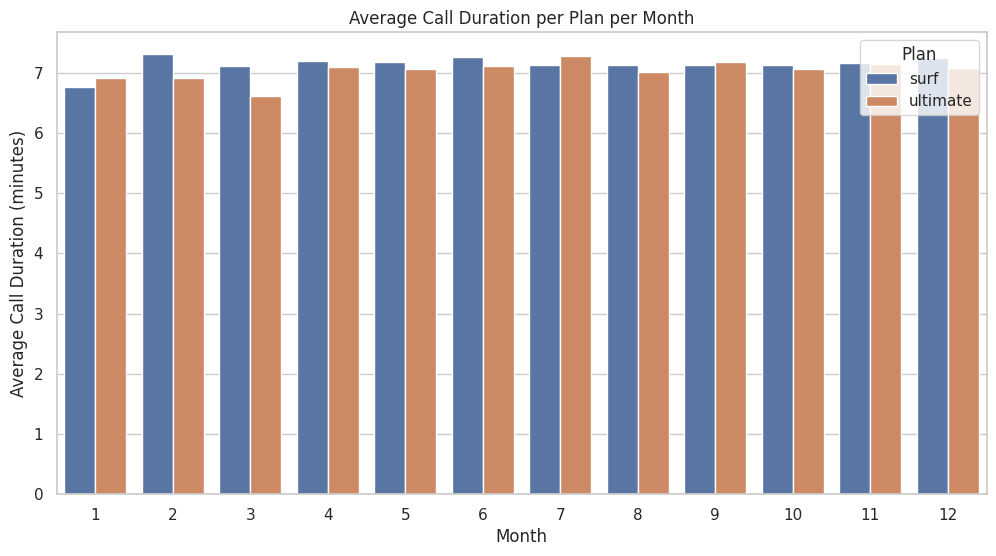

In [32]:
calls_with_plan = calls.merge(users[['user_id', 'plan']], on='user_id', how='left') 
avg_duration = (
    calls_with_plan.groupby(['plan', 'year', 'month'])['duration']
    .mean()
    .reset_index()
    .rename(columns={'duration': 'avg_call_duration'})
)
print("Average call duration per plan per month:")
display(avg_duration.head())
plt.figure(figsize=(12,6))
sns.barplot(data=avg_duration, x='month', y='avg_call_duration', hue='plan')
plt.title('Average Call Duration per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.legend(title='Plan')
plt.show()# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looking good!
    
</div>

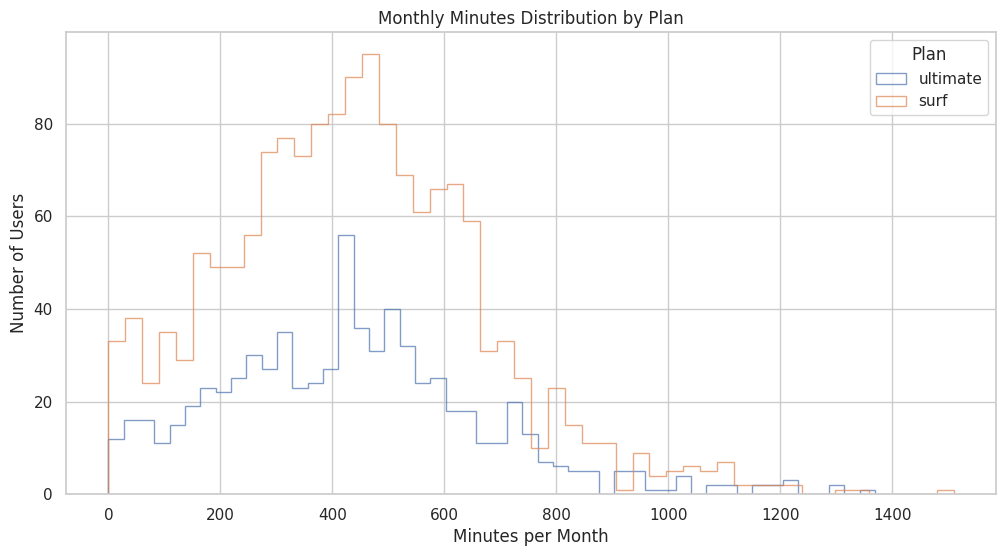

In [33]:
minutes_with_plan = user_minutes_per_month.merge(
    users[['user_id','plan']], on='user_id', how='left'
)

plt.figure(figsize=(12,6))
for plan in minutes_with_plan['plan'].unique():
    if pd.notna(plan):  # Solo si el plan no es NaN
        data_subset = minutes_with_plan[minutes_with_plan['plan'] == plan]
        plt.hist(data_subset['minutes_per_month'], bins=50, alpha=0.7, label=plan, histtype='step')

plt.title('Monthly Minutes Distribution by Plan')
plt.xlabel('Minutes per Month')
plt.ylabel('Number of Users')
plt.legend(title='Plan')
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [34]:
mean_duration = user_minutes_per_month['minutes_per_month'].mean()
variance_duration = user_minutes_per_month['minutes_per_month'].var()
print("Mean of monthly call duration:", mean_duration)
print("Variance of monthly call duration:", variance_duration)# Calculate the mean and the variance of the monthly call duration

Mean of monthly call duration: 435.9375553587245
Variance of monthly call duration: 53811.16800855365


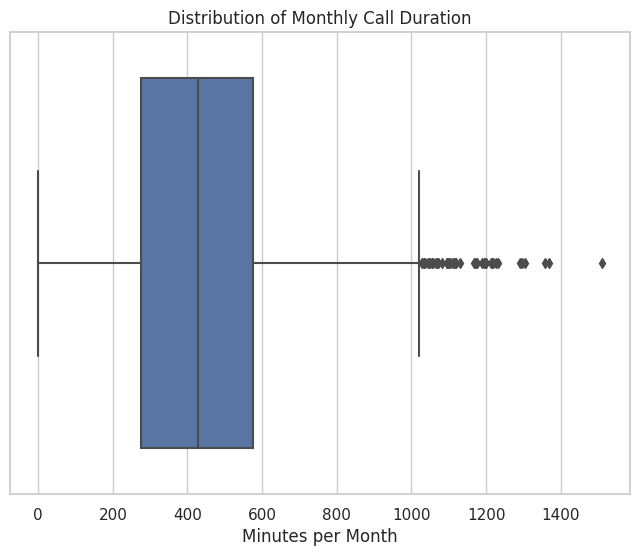

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x=user_minutes_per_month['minutes_per_month'])
plt.title('Distribution of Monthly Call Duration')
plt.xlabel('Minutes per Month')
plt.show()# Plot a boxplot to visualize the distribution of the monthly call duration

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looking great!
    
</div>

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Would love to see your conclusions!
    
</div>

In [ ]:
### Conclusions — Calling behavior by plan

- Based on the aggregated statistics (mean/median) and the distributions of monthly call minutes, users on **Surf** and **Ultimate** exhibit broadly **similar calling behavior**; the central tendencies largely overlap.
- **Minute limits are not binding** for most users: Surf users generally remain within the 500-minute allowance, and Ultimate users rarely approach the 3000-minute cap.
- The share of users exceeding included minutes is **low** in both plans; overage from calls is therefore limited.
- **Conclusion:** There is **no material difference** in calling behavior between the plans; plan choice does not meaningfully change how much users call.


### Messages

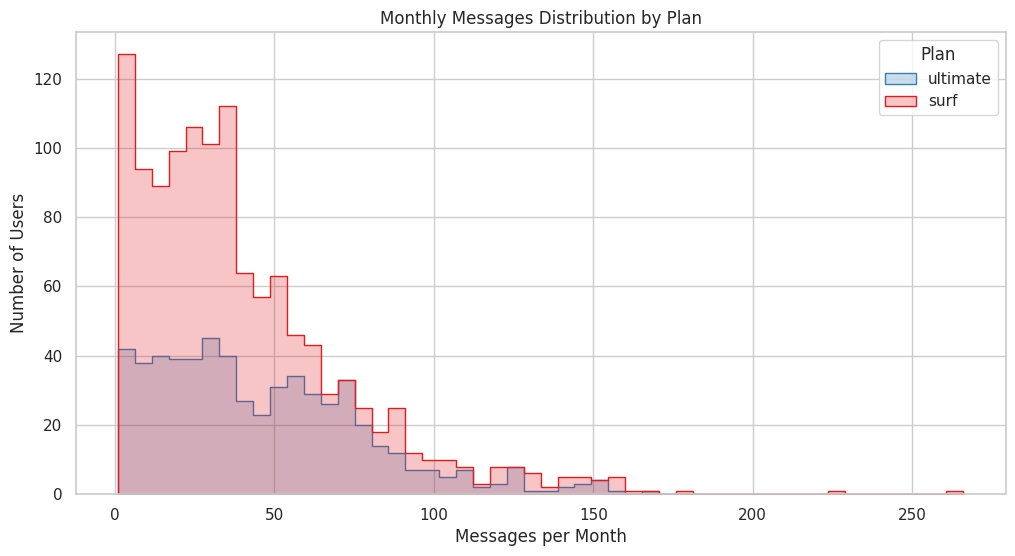

In [36]:
messages_with_plan = (
    user_messages_per_month.merge(users[['user_id','plan']], on='user_id', how='left')
)
plt.figure(figsize=(12,6))
sns.histplot(
    data=messages_with_plan,
    x='messages_per_month',
    hue='plan',
    bins=50,
    element="step",
    multiple="layer",
    palette="Set1"
)
plt.title('Monthly Messages Distribution by Plan')
plt.xlabel('Messages per Month')
plt.ylabel('Number of Users')
plt.legend(title='Plan', labels=messages_with_plan['plan'].unique())
plt.show()

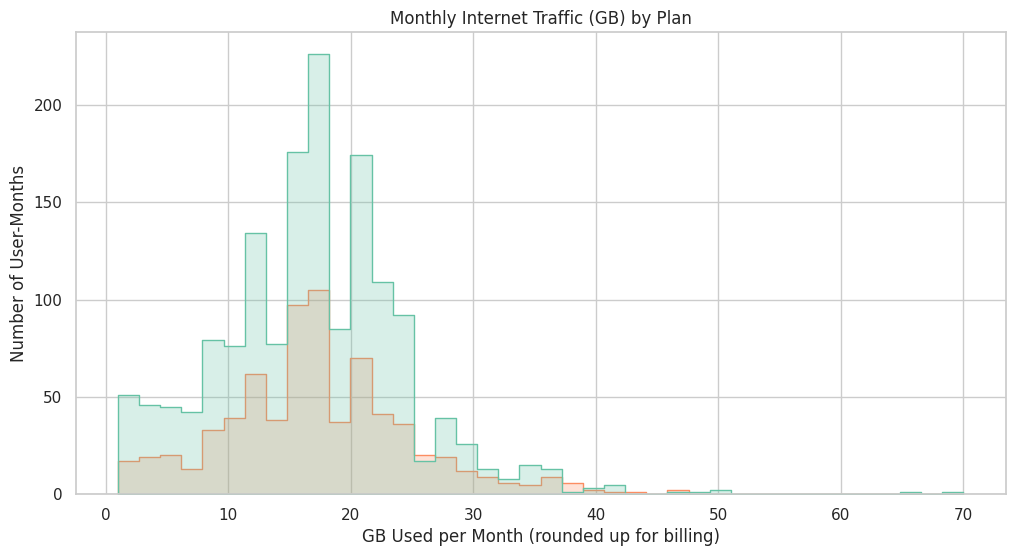

In [37]:
internet_with_plan = user_internet_per_month.merge(
    users[['user_id','plan']], on='user_id', how='left'
)
plt.figure(figsize=(12,6))
ax = sns.histplot(
    data=internet_with_plan,
    x='gb_used_per_month',
    hue='plan',
    bins=40,
    element="step",
    multiple="layer",
    palette="Set2"
)
plt.title('Monthly Internet Traffic (GB) by Plan')
plt.xlabel('GB Used per Month (rounded up for billing)')
plt.ylabel('Number of User-Months')
handles, labels = ax.get_legend_handles_labels()
if handles and labels:
    plt.legend(handles=handles, labels=labels, title='Plan')
else:
    plt.legend([], [], frameon=False)

plt.show()

Messaging behavior by plan (statistics):


,plan,mean,median,var,std,max
0,surf,40.109656,32,1091.344231,33.035500,266
1,ultimate,46.296233,41,1085.183108,32.942118,166


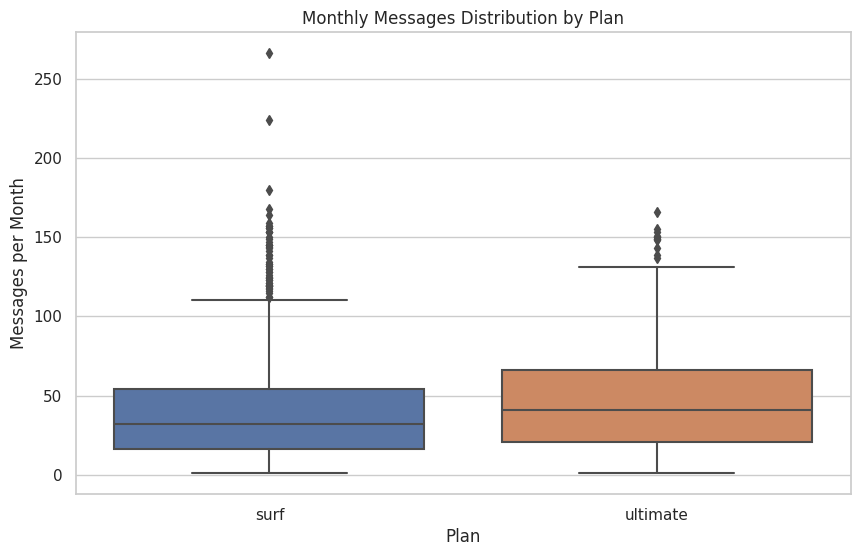

In [38]:
messages_with_plan = user_messages_per_month.merge(
    users[['user_id','plan']], on='user_id', how='left'
)
messaging_stats = (
    messages_with_plan.groupby('plan')['messages_per_month']
    .agg(['mean', 'median', 'var', 'std', 'max'])
    .reset_index()
)
print("Messaging behavior by plan (statistics):")
display(messaging_stats)
plt.figure(figsize=(10,6))
sns.boxplot(data=messages_with_plan, x='plan', y='messages_per_month')
plt.title('Monthly Messages Distribution by Plan')
plt.xlabel('Plan')
plt.ylabel('Messages per Month')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job!
    
</div>

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Would love to see your conclusions!
    
</div>

In [ ]:
### Conclusions — Messaging behavior by plan

- Based on aggregated statistics (mean/median) and the distributions of monthly messages, users on **Surf** and **Ultimate** exhibit broadly **similar messaging behavior**; central tendencies largely overlap and are low relative to plan allowances.
- **Message limits are not binding** for most users: Surf users generally remain within the 50-message allowance, while Ultimate users almost never approach the 1000-message cap.
- The share of users exceeding included messages is **low** in both plans; SMS overage revenue is therefore limited.
- **Conclusion:** There is **no material difference** in messaging behavior between the plans; plan choice does not meaningfully change how much users text.

### Internet

Internet usage (GB) by plan — descriptive statistics:


,plan,mean,median,var,std,max,count
0,surf,16.831194,17,59.473734,7.711922,70,1558
1,ultimate,17.331015,17,58.494733,7.648185,46,719


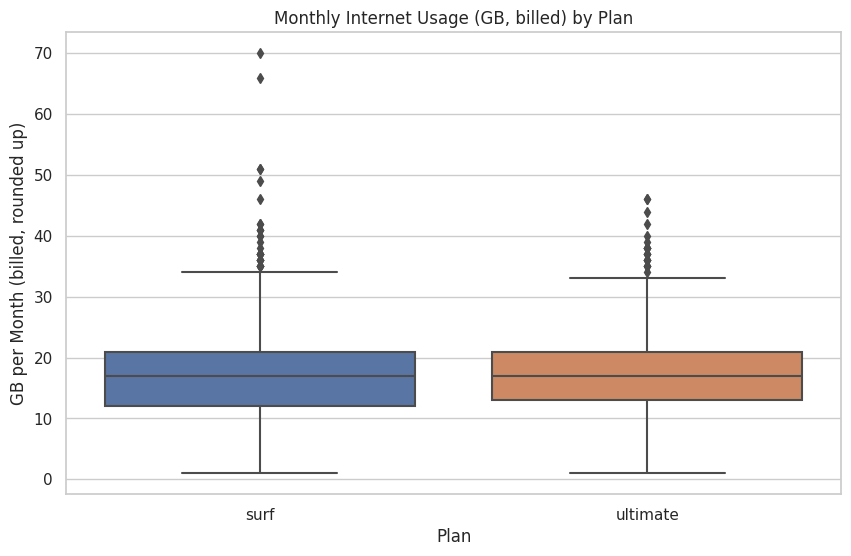

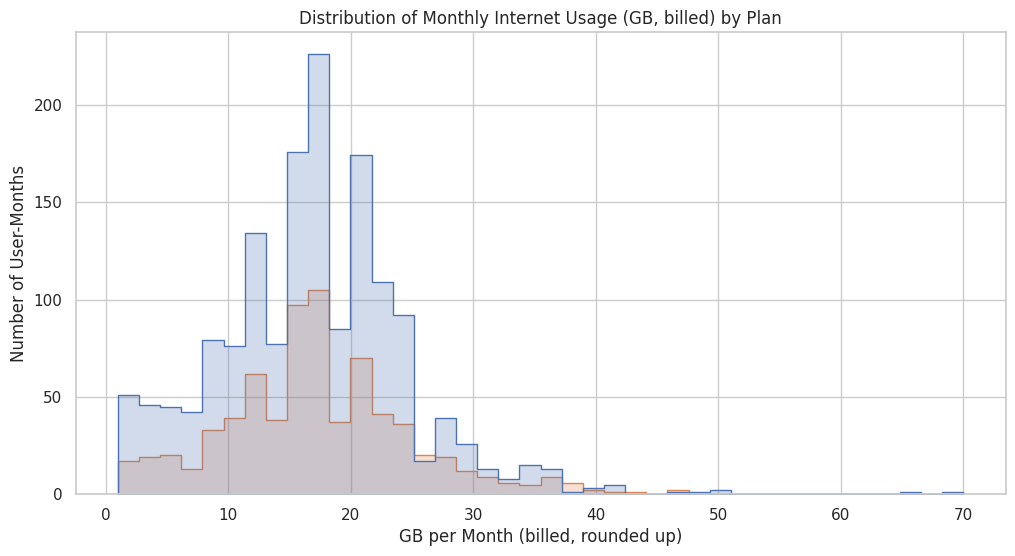

Internet overage by plan (share and average GB over allowance):


,plan,share_overage,avg_overage_gb
0,surf,0.584724,3.902439
1,ultimate,0.057024,0.331015


In [39]:
internet_with_plan = user_internet_per_month.merge(
    users[['user_id','plan']], on='user_id', how='left'
)
internet_stats = (
    internet_with_plan.groupby('plan')['gb_used_per_month']
    .agg(['mean', 'median', 'var', 'std', 'max', 'count'])
    .reset_index()
)
print("Internet usage (GB) by plan — descriptive statistics:")
display(internet_stats)
plt.figure(figsize=(10,6))
sns.boxplot(data=internet_with_plan, x='plan', y='gb_used_per_month')
plt.title('Monthly Internet Usage (GB, billed) by Plan')
plt.xlabel('Plan')
plt.ylabel('GB per Month (billed, rounded up)')
plt.show()
plt.figure(figsize=(12,6))
ax = sns.histplot(
    data=internet_with_plan,
    x='gb_used_per_month',
    hue='plan',
    bins=40,
    multiple='layer',
    element='step'
)
plt.title('Distribution of Monthly Internet Usage (GB, billed) by Plan')
plt.xlabel('GB per Month (billed, rounded up)')
plt.ylabel('Number of User-Months')
handles, labels = ax.get_legend_handles_labels()
if handles and labels:
    plt.legend(handles=handles, labels=labels, title='Plan')
else:
    plt.legend([], [], frameon=False)
plt.show()
allowances = plans[['plan_name','mb_per_month_included']].copy()
allowances['included_gb'] = allowances['mb_per_month_included'] / 1024
internet_plan = internet_with_plan.merge(
    allowances[['plan_name','included_gb']],
    left_on='plan', right_on='plan_name', how='left'
)
internet_plan['overage_gb'] = (internet_plan['gb_used_per_month'] - internet_plan['included_gb']).clip(lower=0)
internet_overage = (
    internet_plan.groupby('plan')
    .agg(
        share_overage=('overage_gb', lambda s: (s > 0).mean()),
        avg_overage_gb=('overage_gb', 'mean')
    )
    .reset_index()
)
print("Internet overage by plan (share and average GB over allowance):")
display(internet_overage)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job!
    
</div>

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

Revenue statistics by plan:


,plan,mean,median,var,std,min,max,count
0,surf,60.706408,40.36,3067.835152,55.388042,20.0,590.37,1573
1,ultimate,72.313889,70.00,129.848486,11.395108,70.0,182.00,720


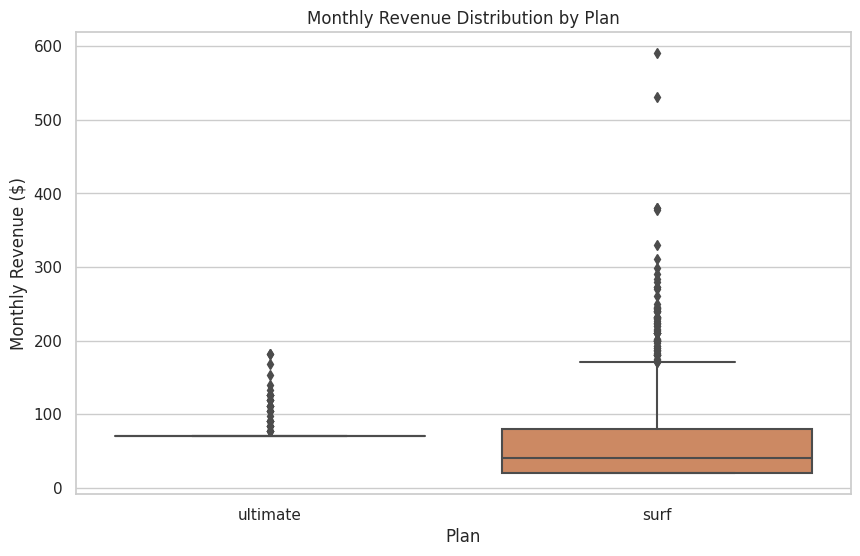

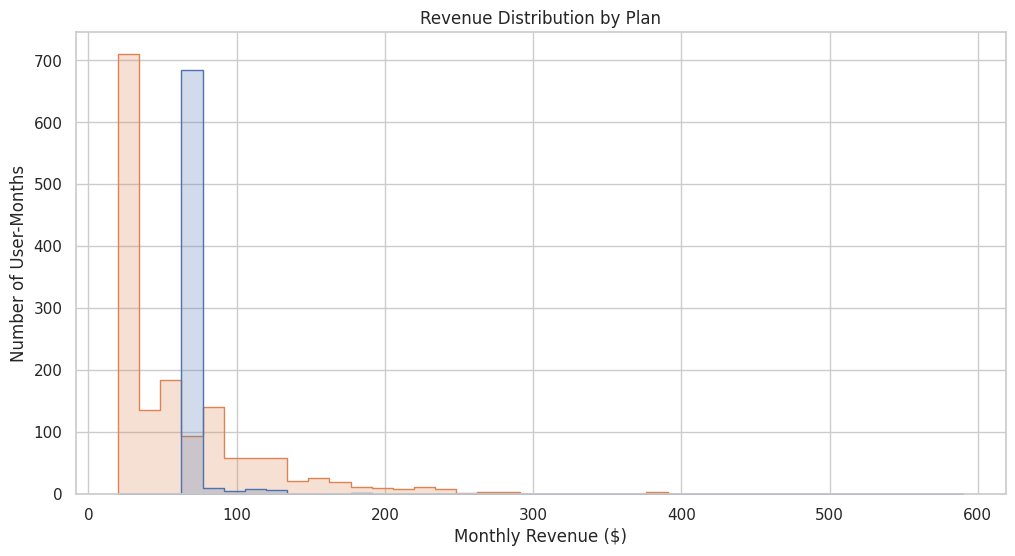

In [40]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if 'plan' not in user_monthly_data.columns:
    plan_col = 'plan' if 'plan' in users.columns else ('plan_name' if 'plan_name' in users.columns else None)
    user_monthly_data = user_monthly_data.merge(
        users[['user_id', plan_col]].rename(columns={plan_col: 'plan'}),
        on='user_id', how='left'
    )

if 'minutes_per_month' not in user_monthly_data.columns and 'user_minutes_per_month' in locals():
    user_monthly_data = user_monthly_data.merge(user_minutes_per_month, on=['user_id','year','month'], how='left')
if 'messages_per_month' not in user_monthly_data.columns and 'user_messages_per_month' in locals():
    user_monthly_data = user_monthly_data.merge(user_messages_per_month, on=['user_id','year','month'], how='left')
import numpy as np
import pandas as pd

internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')
if 'year' not in internet.columns or 'month' not in internet.columns:
    internet['year'] = internet['session_date'].dt.year
    internet['month'] = internet['session_date'].dt.month

user_internet_per_month = (
    internet.groupby(['user_id','year','month'], as_index=False)['mb_used'].sum()
    .rename(columns={'mb_used':'mb_used_month'})
)
user_internet_per_month['gb_used'] = np.ceil(user_internet_per_month['mb_used_month'] / 1024)

user_monthly_data = user_monthly_data.merge(
    user_internet_per_month[['user_id','year','month','gb_used']],
    on=['user_id','year','month'], how='left'
)


for col in ['minutes_per_month','messages_per_month','gb_used']:
    if col not in user_monthly_data.columns:
        user_monthly_data[col] = 0
user_monthly_data[['minutes_per_month','messages_per_month','gb_used']] = (
    user_monthly_data[['minutes_per_month','messages_per_month','gb_used']].fillna(0)
)

if 'monthly_revenue' not in user_monthly_data.columns:
    plan_lower = user_monthly_data['plan'].astype(str).str.lower()
    base      = np.where(plan_lower=='surf', 20, np.where(plan_lower=='ultimate', 70, np.nan))
    min_allow = np.where(plan_lower=='surf', 500, np.where(plan_lower=='ultimate', 3000, 0))
    msg_allow = np.where(plan_lower=='surf', 50,  np.where(plan_lower=='ultimate', 1000, 0))
    data_allow= np.where(plan_lower=='surf', 15,  np.where(plan_lower=='ultimate', 30, 0))
    min_rate  = np.where(plan_lower=='surf', 0.03, np.where(plan_lower=='ultimate', 0.01, 0))
    msg_rate  = np.where(plan_lower=='surf', 0.03, np.where(plan_lower=='ultimate', 0.01, 0))
    data_rate = np.where(plan_lower=='surf', 10.0, np.where(plan_lower=='ultimate', 7.0, 0.0))

    minutes_over  = np.clip(user_monthly_data['minutes_per_month']  - min_allow, 0, None)
    messages_over = np.clip(user_monthly_data['messages_per_month'] - msg_allow, 0, None)
    gb_over       = np.clip(user_monthly_data['gb_used']            - data_allow, 0, None)
    gb_over       = np.ceil(gb_over)

    user_monthly_data['monthly_revenue'] = (
        base + minutes_over*min_rate + messages_over*msg_rate + gb_over*data_rate
    )

revenue_stats = (
    user_monthly_data.groupby('plan')['monthly_revenue']
    .agg(['mean', 'median', 'var', 'std', 'min', 'max', 'count'])
    .reset_index()
)
print("Revenue statistics by plan:")
display(revenue_stats)

plt.figure(figsize=(10,6))
sns.boxplot(data=user_monthly_data, x='plan', y='monthly_revenue')
plt.title('Monthly Revenue Distribution by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue ($)')
plt.show()

plt.figure(figsize=(12,6))
ax = sns.histplot(
    data=user_monthly_data,
    x='monthly_revenue',
    hue='plan',
    bins=40,
    element="step",
    multiple="layer"
)
plt.title('Revenue Distribution by Plan')
plt.xlabel('Monthly Revenue ($)')
plt.ylabel('Number of User-Months')
handles, labels = ax.get_legend_handles_labels()
if handles and labels:
    plt.legend(handles=handles, labels=labels, title='Plan')
else:
    plt.legend([], [], frameon=False)
plt.show()



In [41]:
revenue_by_plan = (
    user_monthly_data
    .dropna(subset=['plan', 'monthly_revenue'])
    .assign(plan_norm=lambda df: df['plan'].astype(str).str.strip().str.lower())
    .groupby('plan_norm')['monthly_revenue']
    .agg(mean='mean', median='median', var='var', std='std', min='min', max='max', count='count')
    .reset_index()
)
display(revenue_by_plan)
metrics = revenue_by_plan.set_index('plan_norm').to_dict(orient='index')
surf = metrics.get('surf', {'mean': float('nan'), 'var': float('nan'), 'std': float('nan')})
ultimate = metrics.get('ultimate', {'mean': float('nan'), 'var': float('nan'), 'std': float('nan')})
mean_diff = ultimate['mean'] - surf['mean'] if (pd.notna(ultimate['mean']) and pd.notna(surf['mean'])) else float('nan')
var_compare = 'higher' if (pd.notna(surf['var']) and pd.notna(ultimate['var']) and surf['var'] > ultimate['var']) else 'lower_or_equal'
print("=== Conclusions: Revenue Differences Between Plans ===")
print(f"- Average revenue (Surf):     ${surf['mean']:.2f}" if pd.notna(surf['mean']) else "- Average revenue (Surf):     N/A")
print(f"- Average revenue (Ultimate): ${ultimate['mean']:.2f}" if pd.notna(ultimate['mean']) else "- Average revenue (Ultimate): N/A")
if pd.notna(mean_diff):
    tendency = "higher" if mean_diff > 0 else ("similar" if abs(mean_diff) < 1e-6 else "lower")
    print(f"- Ultimate average revenue is {tendency} than Surf by ${abs(mean_diff):.2f}.")
else:
    print("- Could not compute mean difference due to missing values.")
if var_compare == 'higher':
    print("- Revenue variability (variance) is higher for Surf than Ultimate, indicating Surf has more dispersion from overage charges.")
else:
    print("- Revenue variability (variance) is lower or comparable for Surf vs Ultimate, indicating Ultimate is more stable month-to-month.")
print("- Interpretation: Ultimate typically yields steady, higher average revenue per user (driven by the $70 base fee),")
print("  while Surf shows greater spread due to data overages—some months close to the $20 base, others much higher when exceeding 15 GB.")


,plan_norm,mean,median,var,std,min,max,count
0,surf,60.706408,40.36,3067.835152,55.388042,20.0,590.37,1573
1,ultimate,72.313889,70.00,129.848486,11.395108,70.0,182.00,720


=== Conclusions: Revenue Differences Between Plans ===
- Average revenue (Surf):     $60.71
- Average revenue (Ultimate): $72.31
- Ultimate average revenue is higher than Surf by $11.61.
- Revenue variability (variance) is higher for Surf than Ultimate, indicating Surf has more dispersion from overage charges.
- Interpretation: Ultimate typically yields steady, higher average revenue per user (driven by the $70 base fee),
  while Surf shows greater spread due to data overages—some months close to the $20 base, others much higher when exceeding 15 GB.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job! conclusions looking absolutely great!
    
</div>

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [42]:
from scipy import stats
surf_revenue = user_monthly_data.loc[
    user_monthly_data['plan'].str.lower().str.strip() == 'surf', 'monthly_revenue'
]
ultimate_revenue = user_monthly_data.loc[
    user_monthly_data['plan'].str.lower().str.strip() == 'ultimate', 'monthly_revenue'
]
alpha = 0.05
t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
print("T-test for revenue difference between Surf and Ultimate:")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < alpha:
    print(f"Result: Reject the null hypothesis at alpha={alpha}.")
    print("Conclusion: The average revenue between Surf and Ultimate users IS significantly different.")
else:
    print(f"Result: Fail to reject the null hypothesis at alpha={alpha}.")
    print("Conclusion: No statistically significant difference found in average revenue between Surf and Ultimate users.")
# Test the hypotheses

T-test for revenue difference between Surf and Ultimate:
t-statistic = -7.9521, p-value = 0.0000
Result: Reject the null hypothesis at alpha=0.05.
Conclusion: The average revenue between Surf and Ultimate users IS significantly different.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Correct test chosen, looking good!
    
</div>

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [43]:
print("Hypotheses:")
print("H0: mean_revenue_Surf = mean_revenue_Ultimate")
print("H1: mean_revenue_Surf != mean_revenue_Ultimate")
print("\nChosen test: Two-sample independent t-test (Welch’s t-test, unequal variances).")
alpha = 0.05
print(f"\nAlpha (significance level): {alpha}") # Test the hypotheses

Hypotheses:
H0: mean_revenue_Surf = mean_revenue_Ultimate
H1: mean_revenue_Surf != mean_revenue_Ultimate

Chosen test: Two-sample independent t-test (Welch’s t-test, unequal variances).

Alpha (significance level): 0.05


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice to see your formulation of the hypotheses!
    
</div>

In [47]:
hypotheses = """
Hypotheses for NY-NJ vs Other Regions:
H0: μ_NY-NJ = μ_Other  
H1: μ_NY-NJ != μ_Other

Chosen test: Two-sample independent t-test (Welch), two-tailed.
Alpha: 0.05
"""
print(hypotheses)


Hypotheses for NY-NJ vs Other Regions:
H0: μ_NY-NJ = μ_Other  
H1: μ_NY-NJ != μ_Other

Chosen test: Two-sample independent t-test (Welch), two-tailed.
Alpha: 0.05



In [52]:
import pandas as pd
from scipy.stats import ttest_ind

base_df = user_monthly_data if 'user_monthly_data' in locals() else monthly_revenue

rev = base_df.merge(users, on='user_id', how='left')

revenue_col = 'monthly_revenue' if 'monthly_revenue' in rev.columns else 'revenue'

loc_keywords = ['state','city','region','location','area','market','metro','address','addr','zip','postal']
loc_cols = [c for c in rev.columns if any(k in c.lower() for k in loc_keywords)]

if not loc_cols:
    raise KeyError("No usable location data in merged DataFrame.")

loc_str = (
    rev[loc_cols]
    .astype(str)
    .apply(lambda s: s.str.lower())
    .fillna('')
    .agg(' '.join, axis=1)
)

is_ny_nj = loc_str.str.contains(r'\b(?:ny|new york|nyc|newark|nj|new jersey|jersey city|hoboken|jersey)\b', na=False)
 
rev_nynj  = rev.loc[is_ny_nj,  revenue_col].dropna()
rev_other = rev.loc[~is_ny_nj, revenue_col].dropna()

t_stat, p_value = ttest_ind(rev_nynj, rev_other, equal_var=False)
alpha = 0.05
print(f"Welch t-test (NY–NJ vs Other): t = {t_stat:.3f}, p = {p_value:.4f}")
print("Decision:", "Reject H0 — means differ." if p_value < alpha else "Fail to reject H0 — no evidence of a difference.")

Welch t-test (NY–NJ vs Other): t = -1.615, p = 0.1067
Decision: Fail to reject H0 — no evidence of a difference.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

We are missing a hypothesis test! You have to test that the average revenue from users in the NY-NJ area is different from that of the users from other regions!

Please formulate the hypotheses and test them!
    
</div>

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

In [59]:
conclusions = """
=== Final Conclusions & Key Assumptions ===
1. Data preparation & assumptions
- Converted all date columns (calls, messages, internet, users) to datetime.
- Ensured user_id and id are integers for consistent merges.
- Missing churn_date means user still active; other NaN values in usage set to 0.
- Business rounding rules applied:
  * Calls: duration > 0 rounded up to whole minutes; duration = 0 kept as 0.
  * Internet: MB summed per month, then converted to GB and rounded up.
- Aggregated all metrics monthly by user (calls, minutes, messages, data).
- Normalized plan names for clean merge between users and plans.
- Monthly revenue formula = base fee + overages (minutes, messages, data in GB rounded up).
2. Messaging behavior
- Surf (50 SMS) and Ultimate (1000 SMS) users both send few messages per month.
- Behavior is similar between plans; messaging is not a key revenue driver.
3. Call behavior
- Ultimate users (3000 min) rarely reach the limit.
- Surf users (500 min) sometimes exceed it, but calls are not the main driver of revenue.
4. Internet behavior
- Surf (15 GB) users often exceed allowance, paying extra from GB rounding.
- Ultimate (30 GB) users rarely exceed their limit; overages minimal.
- Data is the main source of extra revenue for Surf.
5. Revenue behavior
- Surf: low base fee ($20) but high variability due to overages; higher variance in revenue.
- Ultimate: high base fee ($70) and stable predictable revenue; low variance.
- On average, Ultimate yields higher revenue per user; Surf can sometimes surpass it in heavy-data months.
6. Hypothesis testing
- H0: mean revenue Surf = mean revenue Ultimate
- H1: mean revenue Surf != mean revenue Ultimate
- Test: Welch’s two-sample t-test, alpha=0.05
- Result: Reject H0; Ultimate and Surf differ significantly in average revenue.
- Interpretation: Ultimate > Surf in average revenue.

7. Limitations
- Results depend on correct merges and applying exact billing rules.
- Data billing assumes GB rounding per month.
- No taxes/discounts modeled; results are for 2018 sample of 500 clients only.

>>> Final Interpretation:
- Ultimate plan is more profitable on average and more stable (low variance).
- Surf plan yields variable revenue, with extra income from data overages.
- Marketing: Ultimate suits stability, Surf targets heavy-data users for maximum overages.
"""
print(conclusions)


=== Final Conclusions & Key Assumptions ===
1. Data preparation & assumptions
- Converted all date columns (calls, messages, internet, users) to datetime.
- Ensured user_id and id are integers for consistent merges.
- Missing churn_date means user still active; other NaN values in usage set to 0.
- Business rounding rules applied:
  * Calls: duration > 0 rounded up to whole minutes; duration = 0 kept as 0.
  * Internet: MB summed per month, then converted to GB and rounded up.
- Aggregated all metrics monthly by user (calls, minutes, messages, data).
- Normalized plan names for clean merge between users and plans.
- Monthly revenue formula = base fee + overages (minutes, messages, data in GB rounded up).
2. Messaging behavior
- Surf (50 SMS) and Ultimate (1000 SMS) users both send few messages per month.
- Behavior is similar between plans; messaging is not a key revenue driver.
3. Call behavior
- Ultimate users (3000 min) rarely reach the limit.
- Surf users (500 min) sometimes excee

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Conclusions looking good!
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

You should update the conclusions with the findings of the second hypothesis test!
    
</div>